# Machine Learning Foundation Nanodegree
# Project: Investigate a TMDb movie Database

----
## Table of Contents

- [Introduction](#Introduction)
 - [Questions to be Answered](#Questions-to-be-Answered)
 - [Wrangling & Cleaning](#What-needs-to-be-Wrangled-and-Cleaned)
- [Data Cleaning](#Data-Cleaning)
- [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
 - [Question 1](#Q1)
   - [A](#1A)
   - [B](#1B)
   - [C](#1C)
   - [D](#1D)
   - [E](#1E)
   - [F](#1F)
 - [Question 2](#Q2)
   - [A](#2A)
   - [B](#2B)
   - [C](#2C)
   - [D](#2D)
   - [E](#2E)
   - [F](#2F)
   - [G](#2G)
   - [H](#2H)
- [Conclusion](#Conclusion)

-----
## Introduction

In this project of my Data Analysis, I am investigating a TMDb movies database file which has collection of important detials of about 10k+ movies, including their details of budget, revenue, release dates, etc.

Let's take a glimpse at TMDb movie database csv file...

In [1]:
import pandas as pd

#reading tmdb csv file and storing that to a variable
glimpse_tmdb = pd.read_csv('data.csv')

#calling out first 5 rows (excluding headers) of tmdb database
glimpse_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


### What can we say about the dataset provided?
<ul>
    <li>The columns *'budget', 'revenue', 'budget_adj', 'revenue_adj'* has not given us the currency but for this dataset we will assume that it is in dollars.</li>
    <li>The vote count for each movie is not similar, for example, the movie *'Mad Max : Fury Road'* has *6k+* votes while *Sinister 2* has only *331 votes* (as seen above). Since the votes of the movies vary so much the *vote_average* column also is effected by it. So we cannot calculate or assume that movie with highest votes or rating was more successful since the voters of each film vary.</li>
</ul>  

### What Questions can be brainstormed?
Looking at this database...
<ul>
<li>The first question comes in my mind is which movie gained the most profit or we can also kind of say that which movie has been the people's favourite?</li>

<li>Since this is just the glimpse of the database, the glimpse of the data just shows the movies in the year 2015, but there are also other movies released in different years so the Second question comes in my mind is in which year the movies made the most profit?</li>

<li>Finally my curious mind wanted to know what are the similar characteristics of movies which have gained highest profits?</li>
</ul>

### What needs to be Wrangled and Cleaned
Based on the questions brainstormed above, we want to know do we have all the valid values of the variables that we want to calculate and how can this data be trimmed so we can only have the columns we need. This will also make our dataset clean and easy for us to calculate what we want.
<ul>
<li>As you can see in this database of movies there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. So we need to delete these rows.</li>

<li>Also this dataset has some duplicate rows. We have to clean that too for appropriate results.</li>

<li>We will also calculate the average runtime of the movies so in case if we have a runtime of a movie '0' then we need to replace it with `NaN`.</li>

<li>The *'release_date'* column must be converted into date format.</li>

<li>Checking if all columns are in the desired data type, if not then we have to change it.</li>

<li>Mentioning the country currency in the desired columns.</li>

<li>Finally, we will also remove unnecessory columns such as *'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count' and 'vote_average'.* </li>
</ul>




### Questions to be Answered
<ol>
    <li>General questions about the dataset.</li>
        <ol type = 'a'>
            <li>Which movie earns the most and least profit?</li>
            <li>Which movie had the greatest and least runtime?</li>
            <li>Which movie had the greatest and least budget?</li>
            <li>Which movie had the greatest and least revenue?</li>
            <li>What is the average runtime of all movies?</li>
            <li>In which year we had the most movies making profits?</li>
        </ol>
    <li>What are the similar characteristics does the most profitable movie have?</li>
        <ol type = 'a'>
            <li>Average duration of movies.</li>
            <li>Average Budget.</li>
            <li>Average revenue.</li>
            <li>Average profits.</li>
            <li>Which director directed most films?</li>
            <li>Whcih cast has appeared the most?</li>
            <li>Which genre were more successful?</li>
            <li>Which month released highest number of movies in all of the years? And which month made the most profit?</li>
        </ol>
</ol>


-----


## Data Cleaning

**Before answering the above questions we need a clean dataset which has columns and rows we need for calculations.**

First, lets clean up the columns.
We will only keep the columns we need and remove the rest of them.

Columns to delete -  `id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.`

In [2]:
#importing all the nescessory libraries we need for our analysis
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#this variable will store the database of tmdb movies into a dataframe
movie_data = pd.read_csv('data.csv')

Let's see how many entries we have of movies in this dataset and features.

In [3]:
rows, col = movie_data.shape
#since 'rows' includes count of a header, we need to remove its count.
print('We have {} total entries of movies and {} columns/features of it.'.format(rows-1, col))

We have 10865 total entries of movies and 21 columns/features of it.


In [4]:
#lets give a list of movies that needs to be deleted
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

 
#deleting the columns from the database
movie_data = movie_data.drop(del_col, 1)
#now take a look at this new dataset
movie_data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/2015,2015


The difference between the database before and now can be seen. This database is soothing to eyes as it only contains columns that are needed for analysis. 

Now lets clean for any duplicate rows.

In [5]:
#will drop duplicate rows but will keep the first one
movie_data.drop_duplicates(keep = 'first', inplace = True)

rows, col = movie_data.shape
print('We now have {} total entries of movies and {} columns/features of it.'.format(rows-1, col))

We now have 10864 total entries of movies and 10 columns/features of it.


So we had one duplicate copy of a movie. Now we have 10864 movie entries.

**Now, lets figure out which movies have a value of `'0'` in their `budget` or `revenue`, and then deleting those movies from database.**

In [6]:
#giving list of column names that needs to be checked
check_row = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
movie_data[check_row] = movie_data[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
movie_data.dropna(subset = check_row, inplace = True)

rows, col = movie_data.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 3853 entries of movies.


As you saw in the previous dataset from having 10k+ rows and 21 columns we have now come down to 3853 rows and 10 columns. These many columns are needed for analysis and we have all the rows that have valid values for our calculations.

Now as we are done with cleaning the dataset, let's move on to data wrangling phase.
<br>

-----

## Data Wrangling

**Now first lets check if we have any movie with a runtime value of `0`. If we have any, we will replace with `NaN`.**

In [7]:
#replacing 0 with NaN of runtime column of the dataframe
movie_data['runtime'] = movie_data['runtime'].replace(0, np.NaN)

**Now we need to convert the `'release_date'` column to date format**

In [8]:
#calling the column which need to be formatted in datetime and storing those values in them
movie_data.release_date = pd.to_datetime(movie_data['release_date'])

#showing the dataset
movie_data.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


As you see, the `'release_date'` column has been changed to date format. (year-month-day)

**Lets see if all the columns are in the format that we want for our calculations.**

In [9]:
#shwoing the datatypes of all the columns
movie_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

As we can see we have float values for `'budget'` and `'revenue'` columns, since we dont need float but in int datatype, lets convert them.

In [10]:
#applymap function changes the columns data type to the type 'argument' we pass
change_coltype = ['budget', 'revenue']

movie_data[change_coltype] = movie_data[change_coltype].applymap(np.int64)
#shwoing the datatypes of all columns
movie_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

Now all columns are in the desired format.

**Since the values in the column `'budget'` and `'revenue'` shows us in Currency of US (as assumed earlier), lets change the name of these columns for convenience.**

In [11]:
#rename function renames the columns, the key as being the old name and its value new name of it in form of dictionary.
movie_data.rename(columns = {'budget' : 'budget_(in_US-Dollars)', 'revenue' : 'revenue_(in_US-Dollars)'}, inplace = True)

**Since now we have the columns, rows and format of the dataset in right way, its time to investigate the data for the questions asked.**
<br>

----

## Exploratory Data Analysis

**Before answering the questions, lets figure out the profits of each movie.**

In [12]:
#assigning a new column which will hold the profit values of each movie

#the insert function's first argument is an index number given to locate the column, second argument takes the name of the new column...
#...and last but not least it takes the calculation values to output for specific column

#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
movie_data.insert(2, 'profit_(in_US_Dollars)', movie_data['revenue_(in_US-Dollars)'] - movie_data['budget_(in_US-Dollars)'])

#for just in case situations or for convenience, we change the data type to int
movie_data['profit_(in_US_Dollars)'] = movie_data['profit_(in_US_Dollars)'].apply(np.int64)

#showing the dataset
movie_data.head(2)

,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


All the profits of the movies are now listed and our now a part of our dataset.

**Now let's dig deep and answer the questions!**

> ### Q1
>> ### 1A
#### Which movie earns the most and least profit?

In [13]:
#Let's define a function which calculates lowest and highest values of columns
#taking column name as arguments

def highest_lowest(column_name):
    
    #highest
    #taking the index value of the highest number in profit column
    highest_id = movie_data[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(movie_data.loc[highest_id])
    
    #lowest
    #same processing as above
    lowest_id = movie_data[column_name].idxmin()
    lowest_details = pd.DataFrame(movie_data.loc[lowest_id])
    
    #concatenating two dataframes
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data

#calling the function and passing the argument
highest_lowest('profit_(in_US_Dollars)')

,1386,2244
budget_(in_US-Dollars),237000000,425000000
revenue_(in_US-Dollars),2781505847,11087569
profit_(in_US_Dollars),2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


The column names for the dataframes above are the index number. The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset. 

As we can see the Directed by `James Cameron`, `Avatar` film has the highest profit in all, making over `$2.5B` in profit in this dataset. May be the highest till now of entire human race but we can't say for sure as this dataset doesn't have all the films released till date.

And the most in loss movie in this dataset is `The Warriors Way`. Going in loss by more than `$400M` was directed by `Singmoo Lee`.

Let's continue with our investigation! It's fun!

>> ### 1B
#### Which movie had the greatest and least runtime?

In [14]:
#as our calculations seems to be same as previous one for different column, lets call the function by passing desired argument

highest_lowest('runtime')

,2107,5162
budget_(in_US-Dollars),18000000,10
revenue_(in_US-Dollars),871279,5
profit_(in_US_Dollars),-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


Hmm..! So again the first column shows the runtime of the highest and second the lowest with column names as the index number. 

I have never heard a runtime of a movie so long, yes we would in old times, but in the 21st century, no! Runtime of `338 min`, that's approx 3.5 hrs! So `Carlos` movie has the highest runtime.

The name of the movie with shortest runtime is `Kid's Story`, runtime of just 15 min! Woah! I have never seen such a short movie in my lifetime. Have to check this out though! 

As you see both movies have one thing in common, negative profits! The `Kid's Story` having a budget of `10` dollars and revenue `5` just doesn't seem right to me. It might be but i have never heard or seen a movie with such a short budget. But this what our dataset shows. Okay now let's move forward!


>> ### 1C
#### Which movie had the greatest and least budget?

In [15]:
#as our calculations seems to be same as previous one for different column, lets call the function by passing desired argument

highest_lowest('budget_(in_US-Dollars)')

,2244,2618
budget_(in_US-Dollars),425000000,1
revenue_(in_US-Dollars),11087569,100
profit_(in_US_Dollars),-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


This is Interesting. Same in format as above dataframes, we can see that `The Warriors Way` had the highest budget of all movies in the dataset of about `$425M`. This same movie also had the highest loss. So it makes sense that having the highest budget in all makes the film more harder to have higher revenues and earn more profits.

And the least budget of all, the `Lost & Found` movie of `$1` has made me thinking how can a movie with `95 min` of runtime managed with such low budget! Also making revenue of `$100` and earning a profit `$99`, this may be a local movie release. Because it's kind of impossible to have such low budget and earning low revenues if it has released internationally.
    
Now let's look at the revenue side of the movies...!


>> ### 1D
#### Which movie had the greatest and least budget?

In [16]:
#again, we will call our function! 
highest_lowest('revenue_(in_US-Dollars)')

,1386,5067
budget_(in_US-Dollars),237000000,6000000
revenue_(in_US-Dollars),2781505847,2
profit_(in_US_Dollars),2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


Interesting results again! `Avatar` movie also earning the most profit movie has made most revenue too! Making a revenue of more than `$2.7B`, it makes a logical sense that the more revenue you earn the more profit you gain and as we saw in earlier result, `The Warriors Way` having most budget had less chance of making profits. It really looks that there's correlation between profit and budget/revenue but we can't say just by looking at few results.

Having lowest revenue of `$2`, `Shattered Glass` movie seems like couldn't sell much tickets.

Let's keep exploring!


>> ### 1E
#### What is the average runtime of all movies?

In [17]:
#giving a function which calculates average of a particular column
def average_func(column_name):
    
    return movie_data[column_name].mean()

In [18]:
#calling function to show the mean
average_func('runtime')

109.22029060716139

**The average runtime of all movies in this dataset is `109 mins` approx.
We want to get a deeper look and understanding of runtime of all movies so Let's plot it. **

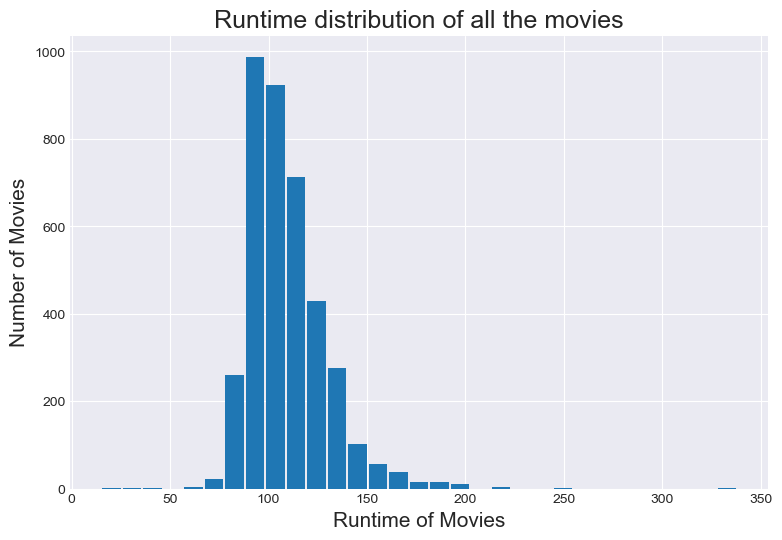

In [19]:
#plotting a histogram of runtime of movies

#gives styles to bg plot
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(movie_data['runtime'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()

The above graph shows us that how many movies lie between the time interval x1 to x2. For example, as you can see the tallest bar here is time interval between `85-100 min`(approx) and around 1000 movies out of 3855 movies have the runtime between these time intervals. So we can also say from this graph that mode time of movies is around `85-110 min`, has the highest concentration of data points around this time interval. The distribution of this graph is positively skewed or right skewed!

**Let's dig deep and figure out the outliers of this distribution.**

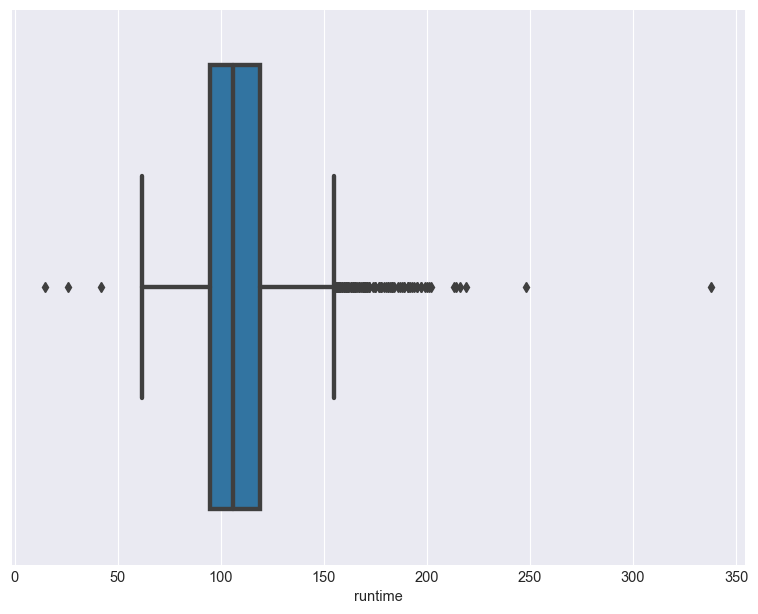

In [20]:
#giving two plots, thr first is the box plot, second is plots of runtime for movies
#giving figure size
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to plot
#plotting box plot
sns.boxplot(movie_data['runtime'], linewidth = 3)
#showing the plot
plt.show()

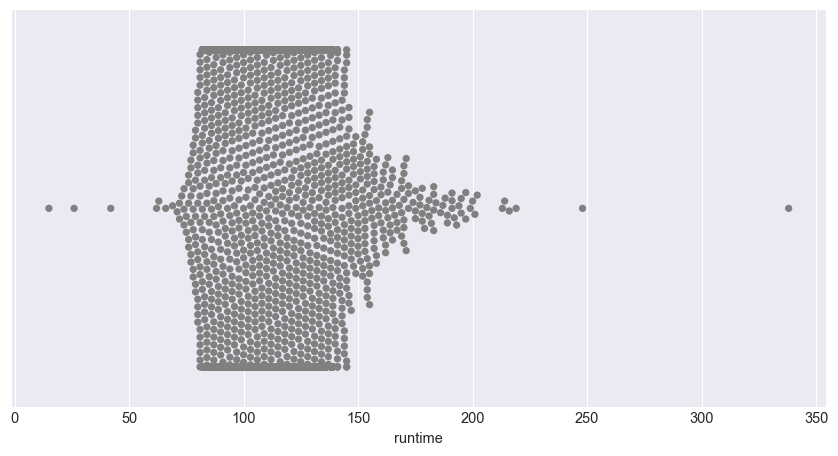

In [21]:
#plots the data points of runtime of movies

#giving figure size
plt.figure(figsize=(10,5), dpi = 105)

sns.swarmplot(movie_data['runtime'], color = 'grey')
plt.show()

In [22]:
#getting specific runtime points at x positions
movie_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

WooW! Both visualizations above shows us the overall distribution of runtime of movies by plotting the points where they lie in the ditribution and how many movies percent of movies lie below the runtime.

What's amazing about box-plot is that it gives us an overall idea of how spread the ditribution in our case the runtime of movies are. First of all what we get from this visualization is how many outliers we have, the min and max points, the median and IQR.

As we already saw in our previous calculations of least and highest runtime, this is the appropriate visualization in the comparison of other movies runtime. By looking at the box-plot we don't get the exact values, for example you can guess that the median is will around 100-110 min but by giving the describe function above we get the exact values.

So by looking at both, visualiztions and calculations, we can say that..
<ul>
    <li>There are 25% of movies having a runtime of less than `95 min`</li>
    <li>There are 50% of movies having a runtime of less than `109 min`. This is also the median of runtimes.</li>
    <li>There are 75% of movies having a runtime of less than `119 min`</li>
    <li>50% of movies have a runtime of between 95 min and `119 min`. This is also our IQR.</li>
</ul>

As we can see there are more movies after the 3rd quartile range than the 1st. This makes the mean of the runtime pull towards the right or increases it.

Now lets answer our next question!

>> ### 1F
#### In which year we had the most movies making profits?

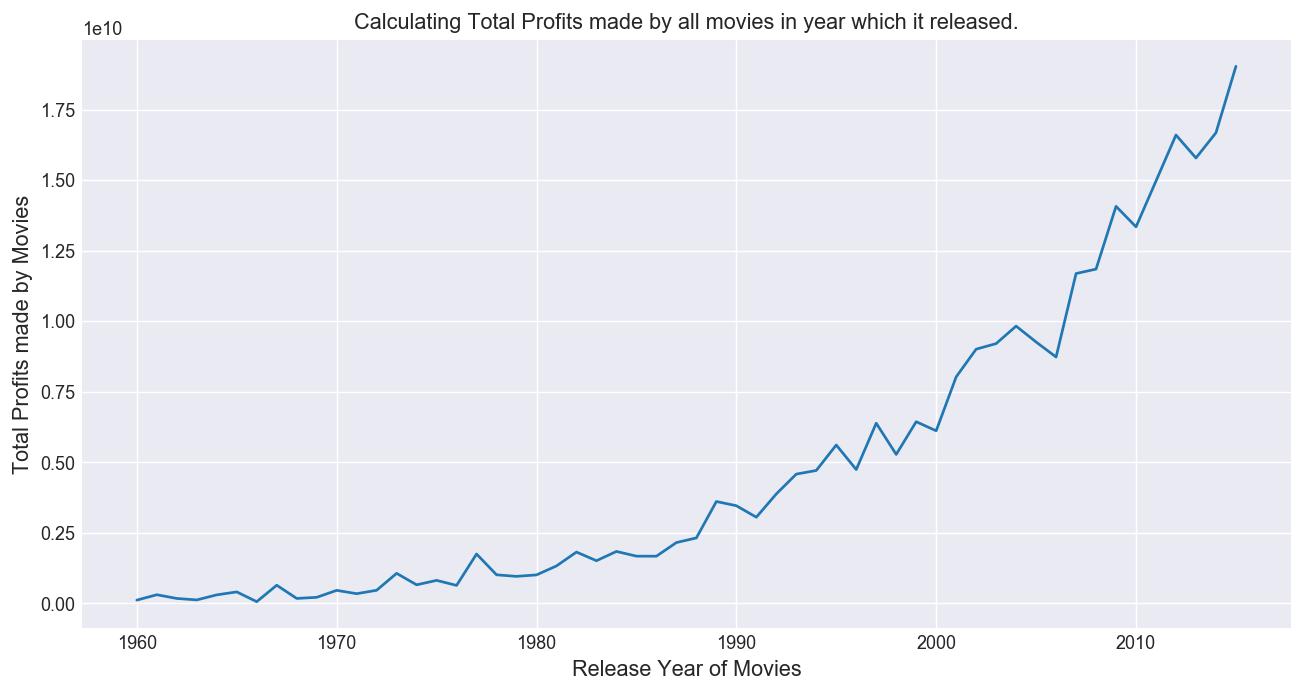

In [23]:
#Line plot used for this
#Since we want to know the profits of movies for every year we need to group all the movies for those years

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profits_each_year = movie_data.groupby('release_year')['profit_(in_US_Dollars)'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)
#title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profits_each_year)

#showing the plot
plt.show()

Before i explain lets understand what the y axis shows us. Each values in the y-axis is been multiplied to `'1e10'` (as shown above the plot). Since the profits of movies are high, having 9+ digits, cannot fit the axis. So for example at the year 2010, the y-aixs value is around `1.35`, which means that the profit at that year made by al movies released in that year is `1.35x1e10 =  13500000000` which is `13.5 billion dollars`.

The year `2015`, shows us the highest peak, having the highest profit than in any year, of more than `18 billion dollars`. This graph doesn't exactly prove us that every year pass by, the profits of movies will increase but when we see in terms of decades it does show significant uprise in profits. At the year `2000`, profits were around `8 biilion dollars`, but in just 15 years it increased by 10+ biilion dollars. Last 15 years had a significant rise in profits compared to any other decades as we can see in the graph.

Not every year had same amount of movies released, the year `2015` had the most movie releases than in any other year. The more old the movies, the more less releases at that year (atleast this is what the dataset shows us).

This dataset also doesn't show all the movies that has been released in each year. If it would the graph might would show some different trend.

Also to note, In the dataset, there were also movies that had negative profits which drags down the the profits of other movies in those years. So we are not just calculating the movies which made profits, but also which went in loss! The highest profit making movie `Avatar` in 2009 alone drags the profit up by `2.5 billion dollars` out of `14 billion dollars`(calculations below).

For convenience, i have shown which year had the most profit. Also we will take a look at the profits of each year with exact figures.

In [24]:
#this answers our question
#shows which year made the highest profit
profits_each_year.idxmax()

2015

In [25]:
#storing the values in the the form of DataFrame just to get a clean and better visual output
profits_each_year = pd.DataFrame(profits_each_year)
#printing out
profits_each_year.tail()

,profit_(in_US_Dollars)
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


`2015` was the year where movies made the highest profit of about `19+ billion dollars` which released in that year.

We are now done with exploring the dataset given. Now we want to find similar characteristics of most profitable movies.

So we need to dig deeper, and that's what we as Data Analysts do! ;)
<br>

-----
<br>
> ### Q2
>> ### 2A
#### Average runtime of movies

Before answering this question, we need to first clean the dataset so we only have the data of movies that made profit not loss. Also we need movies not only who just made profit by some dollars but we need movies who made significant profits and then analyzing similar characteristics of it.

**Let's take only the movies who made profits of 50M dollars or more.**

In [26]:
#assinging new dataframe which holds values only of movies having profit $50M or more
profit_movie_data = movie_data[movie_data['profit_(in_US_Dollars)'] >= 50000000]

#reindexing new dataframe
profit_movie_data.index = range(len(profit_movie_data))
#will initialize dataframe from 1 instead of 0
profit_movie_data.index = profit_movie_data.index + 1

#showing the dataset
profit_movie_data.head(2)

,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [27]:
#number of rows of a dataframe
len(profit_movie_data)

1338

Now we have the appropriate data to work on. From 3855 rows to 1338 rows, meaning more than 2500+ movies approx made profits less than \$50M.

Let's analyze the data now!

In [28]:
#giving a new average function since we have a different dataset
def prof_avg_fuc(column_name):
    return profit_movie_data[column_name].mean()

In [29]:
#mean of runtime
prof_avg_fuc('runtime')

113.66741405082212

Interesting! The mean time for movies making significant profits is likely similar to the mean runtime of movies that we found before of `109.2` which included movies having less than $50M profits. Difference of 4 minutes.

>> ### 2B
#### Average Budget of Movies

In [30]:
#calling the function
prof_avg_fuc('budget_(in_US-Dollars)')

60444957.760837071

The average budget of movies of $50M club in profit is around `$60M dollars`.

>> ### 2C
#### Average Revenue of Movies

In [31]:
#calling the function
prof_avg_fuc('revenue_(in_US-Dollars)')

254957662.59491777

The average revenue of movies of $50M club in profit is around `$255M dollars`.

>> ### 2D
#### Average Profit of Movies

In [32]:
#calling the function
prof_avg_fuc('profit_(in_US_Dollars)')

194512704.83408073

The average profits of movies of $50M club in profit is around `$194M dollars`.

>> ### 2E
#### Which directer directed most films?

In [33]:
#since we have multiple questions answers being similar in logic and code, we will give function which will make our life easier

#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [34]:
#this will variable will store the return value from a function
director_count = extract_data('director')
#shwoing top 5 values
director_count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

**Voila!! `'Steven Spielberg'` takes the crown!** Directing `23 movies` over `$50M+` in profit is no joke! Also the other directors following along the list such as `'Robert Zemeckis', 'Clint Eastwood', 'Tim Burton' etc` prove to be really great directors. Movies directed by these directors is more likely for a movie to make huge profits, the higher the movies they direct that earn huge profits, the higher the probability for a movie to go for success! Since we don't really know how many movies the directors directed in total in their lifetime, we can't say for sure that movies directed by above directors will always earn this much but gives us the idea that how much likely it is when it is directed by them.

Let's dig up for the next question!

>> ### 2F
#### Whcih cast has appeared the most?

In [35]:
#this will variable will store the return value from a function
cast_count = extract_data('cast')
#shwoing top 5 values
cast_count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

Mind Blowing results atleast to me! `'Tome Cruise'` takes the crown for appearing the most in movies profiting more than $50M. Other actors well deserved it as you can see above! Directors hiring these actors will have higher probability of making huge profits also this doesn't mean that actors other than these acting in a film will make less profit. Famous actors such as `'Tom Cruise', 'Brad Pitt', 'Tom Hanks'`, etc have huge fanbase, making the audience attract to the movie more than actors other than these hance this would affect the revenue of the movie but not all time necessory, ultimately it comes down to storyline and other influential factors. By looking at this dataset we can atleast say that these actors acting in a film has the higher probability of attraction to a movie, hence increasing the advantage of earing high profits!

As we said for the directors, goes for the actors too as well! SInce we don't really know how many movies these actors have acted in total in their lifetime, we can't always be sure that movies acted by these actors will always earn this much but gives us the idea that how much likely it is when it is acted by them.

Let's dig more and find similar characteristics of these movies.

>> ### 2G
#### Which genre were more successful?

In [36]:
#this will variable will store the return value from a function
genre_count = extract_data('genres')
#shwoing top 5 values
genre_count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

**Lets visualize this with a plot.**

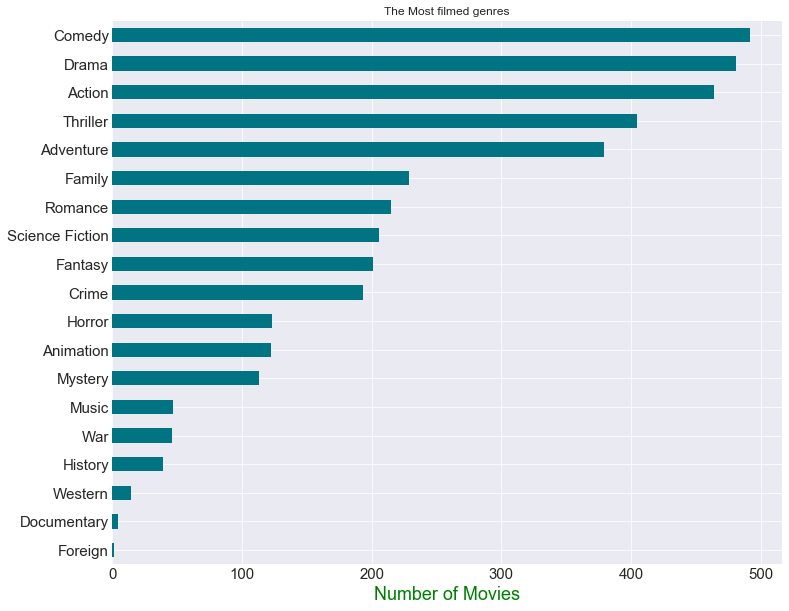

In [37]:
#we want plot to plot points in descending order top to bottom
#since our count is in descending order and graph plot points from bottom to top, our graph will be in ascending order form top to bottom
#hence lets give the series in ascending order
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre_count.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

Another amazing results. `Action, Drama and Comedy genres` are the most as visualized but Comedy takes the prize, about `492 movies` have genres comedy which make $50M+ in profit. In comparison, even `Adventure` and `Thriller` really play the role. These five genres have more number of movies than rest of the genres as shown by visualization. Probability of earning more than \$50M for these genres are higher, but still other genres do count too again it depends on lots of other influential factors that come in play. `Western, war, history, music, documentary` and the most least `foreign` genres have less probability to make this much in profit as in comparison to other genre.

This also doesn't prove that if you have a movie with an `Action, comedy and drama` genre in it will have a guarantee to make more than $50M but it would have a significant interest and attraction to the population.

Let's find one more key characteristic of these movies.

>> ### 2H
#### Which month released highest number of movies in all of the years? And which month made the most profit?

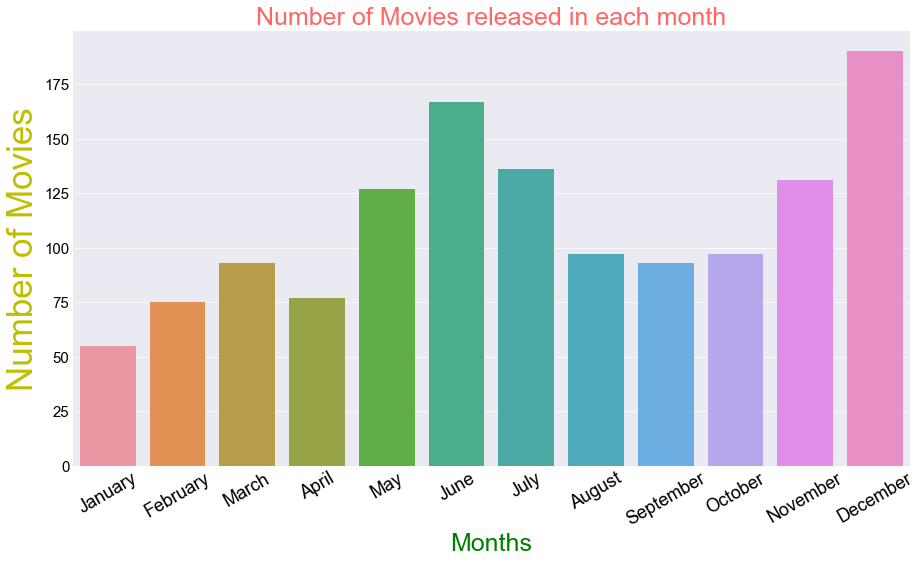

In [38]:
#for answering this question we need to group all of the months of years and then calculate the profits of those months
#giving a new dataframe which gives 'release-date' as index
index_release_date = profit_movie_data.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby([(index_release_date.index.month)])

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index['profit_(in_US_Dollars)'].count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#giving a list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count['profit_(in_US_Dollars)'], data = monthly_movie_count)

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_movie_count_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_movie_count_bar.set_ylabel("Number of Movies", color="y", fontsize = 35)

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

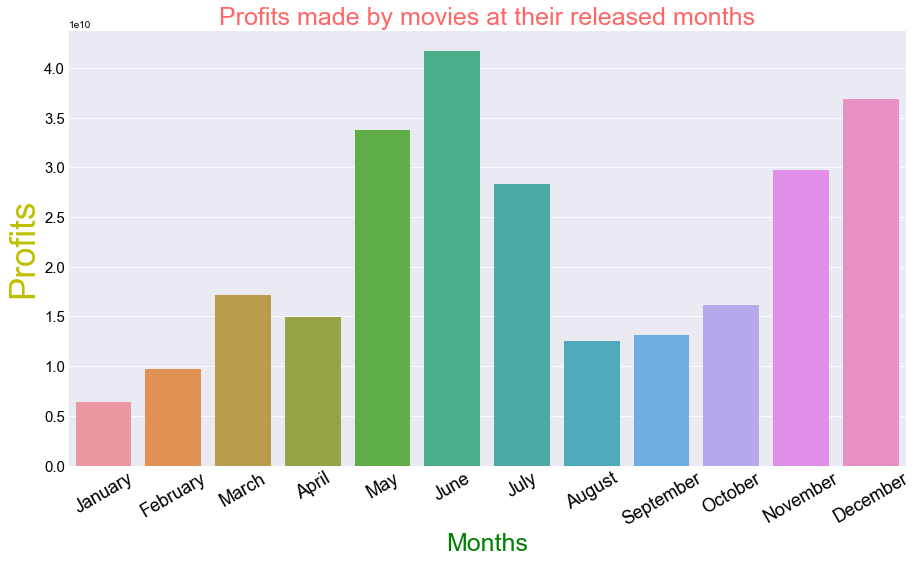

In [39]:
#finding the second part of this question

#now since the data is grouped by month, we add 'profit_(in_US_Dollars)' values to respective months, saving all this to a new var
monthly_profit = groupby_index['profit_(in_US_Dollars)'].sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit['profit_(in_US_Dollars)'], data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="y", fontsize = 35)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

Seeing the both visualizations of both graphs we see similar trend. Where there are more movie released there is more profit and vice versa but just not for one month i.e `December`. December is the month where most movie release but when compared to profits it ranks second. This means that december month has high release rate but less profit margin. The month of June where we have around `165 movie` releases, which is second highest, is the highest in terms of making profits.

Also one more thing is we earlier finded which movie had made the most profit in our dataset, We came up with the answer of movie, `'Avatar'`, and the release month for this movie is in december, also the highest in loss movie had also released in december but that isn't being counted here. Knowing this that you have the highest release rate and highest profit making movie in same month of `December` but falls short in front of `June` month in terms of making profits makes me think that the month of June had movies with significant high profits where in december it didn't had that much high, making it short in terms of profit even though having the advantage of highest release rate.

This visualization doesn't prove us that if we release a movie in those months we will earn more $50M. It just makes us think that the chances are higher, again it depends on other influential factors, such as directors, story, cast etc.

-----

## Conclusion

As i have answered the questions that i thought would be interesting to dig into, i want to wrap up all my findings in this way ....


**Q. If i wanted to show one of the best and most profitable movie, who would i hire as director and cast, which genre would i choose and also at what month would i release the movie in? **

**Ans.** I would..

**Choose any director from this** - Steven Spielberg, Robert Zemeckis, Ron Howard, Tony Scott, Ridley Scott.

**Choose any cast from this** - Actors - Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Denzel Washington.

Actress - Julia Roberts, Anne Hathaway, Angelina Jolie, Scarlett Johansson.
                            
**Choose these genre** - Action, Adventure, Thriller, Comedy, Drama.

**Choose these release months** - May, June, July, November, December.

By doing all this, my probability of making a profitable movie would be higher and obviously i will take care of other influential factors too. ;) And also the runtime of the movie will be around 110 min (mean runtime of movies with \$50M+). 

**Limitations** -  I want to make it clear, it's not 100 percent guaranteed solution that this formula is gonna work, meaning we are going to earn more than \$50M! But it shows us that we have high probability of making high profits if we had similar characteristics as such. All these directors, actors, genres and released dates have a common trend of attraction. If we release a movie with these characteristics, it gives people high expectations from this movie. Thus attracting more people towards the movie but it ultimately comes down to story mainly and also other important influential factors. People having higher expectations gives us less probability of meeting their expectations. Even if the movie was worth, people's high expectations would lead in biased results ultimately effecting the profits. We also see this in real life specially in sequels of movies. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of!

And that's my conclusion! 

------